<div style="font-family: Arial, Helvetica, sans-serif;">
        <div style="font-weight:600; text-align: center; padding-top: 20px;">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC
            QUỐC GIA THÀNH PHỐ HỒ
            CHÍ
            MINH</div>
        <div style="font-size: 26px ;font-weight: 700; text-align: center;padding-top: 20px;">ĐỒ ÁN CUỐI KỲ
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Môn học: </div>
            <div>Lập trình khoa học dữ liệu</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Lớp: </div>
            <div>21_21</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Chủ đề: </div>
            <div>Pokemon</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Nhóm: </div>
            <div>30</div>
        </div>
        <div>
            <h1>Thành viên trong nhóm</h1>
            <table style="font-size: 18px; display:flex;" >
                <tr>
                    <th>STT</th>
                    <th>MSSV</th>
                    <th>Họ và tên</th>
                </tr>
                <tr>
                    <td>1</td>
                    <td>21120546</td>
                    <td style="text-align:left;">Nguyễn Thanh Sang</td>
                </tr>
                <tr>
                    <td>2</td>
                    <td>21120539</td>
                    <td style="text-align:left;">Trần Minh Quang</td>
                </tr>
                <tr>
                    <td>3</td>
                    <td>21120429</td>
                    <td style="text-align:left;">Lưu Kiến Đạt</td>
                </tr>
            </table>
        </div>
</div>

# A. Thu thập dữ liệu

## 1. Chủ đề của data và nguồn gốc của data

- Chủ đề của data nói về các chi tiết của mỗi con Pokemon . Bởi lẽ đây là một chủ đề quen thuộc. Do đó nhóm đã chọn chủ đề này để tìm hiểu về sức mạnh của Pokemon.
- Việc tìm kiếm tập dữ liệu cho chủ đề này là không quá khó vì nó có sẵn, đa dạng, phổ biến và được cung cấp miễn phí ở nhiều website
- Và nhóm em đã thu nhập dữ liệu từ trang Kaggle
- Link lấy dữ liệu : https://www.kaggle.com/datasets/abcsds/pokemon?fbclid=IwAR2dBTk_HK2RWNLROhGnoZYwlAeXzQMs4YkS5Ug9838RtPyHJJuVznGWJqM

## 2. Các điều khoản sử dụng data của tác giả

- Tác giả đã cho phép sử dụng data và đây là file data Public
- License : CCO: Public Domain
- Link License : https://creativecommons.org/publicdomain/zero/1.0/

##  3. Cách tác giả thu nhập dữ liệu

Đây là các thuộc tính thô được sử dụng để tính toán mức độ thiệt hại mà một đòn tấn công sẽ gây ra trong trò chơi. Tập dữ liệu này nói về các trò chơi pokemon (KHÔNG phải thẻ pokemon hoặc Pokemon Go).

Dữ liệu được Myles O'Neill mô tả là : Chi tiết của mỗi pokemon
- Name: Tên của từng pokemon
- Type 1: Mỗi pokemon có một loại, điều này quyết định điểm yếu/khả năng chống lại các cuộc tấn công
- Type 2: Một số pokemon thuộc loại kép và có 2
- Total: tổng của tất cả các chỉ số sau đó, hướng dẫn chung về sức mạnh của pokemon
- HP: điểm nhấn hoặc máu, xác định mức độ sát thương mà pokemon có thể chịu được trước khi ngất xỉu
- Attack: công cụ sửa đổi cơ bản cho các đòn tấn công thông thường (ví dụ: Scratch, Punch)
- Defnse: khả năng chống chịu sát thương cơ bản trước các đòn tấn công thông thường
- SP Atk: đòn tấn công đặc biệt, công cụ sửa đổi cơ sở cho các đòn tấn công đặc biệt (ví dụ: vụ nổ lửa, chùm bong bóng)
- SP Def: khả năng chống chịu sát thương cơ bản trước các đòn tấn công đặc biệt
- Legendary: Loại pokemon đó có phải legend không

Dữ liệu cho bảng này được lấy từ nhiều trang khác nhau, bao gồm:
- pokemon.com
- pokemondb
- bulbapedia

In [1]:
import requests
import json
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# B. Khám phá dữ liệu

## 1. Đọc dữ liệu, tính số dòng và số cột

Đọc dữ liệu từ file `Pokemon.csv` và in ra 5 dòng đầu tiên

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Tính số dòng, số cột và lưu vào 2 biến `num_rows` và `num_cols`

In [3]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 800
Number of columns: 13


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu là thông tin và các chỉ số về Thông tin, tính chất và các chỉ số về sức mạnh của mỗi loại Pokemon trong game Pokemon Go. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức là không có dòng nào bị bỏ rơi .

## 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp

In [4]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp lặp 

## 4. Mỗi cột có ý nghĩa gì?

- 'Name' : Tên Pokemon
- 'Type1' : Hệ chính của Pokemon
- 'Type2' : Hệ phụ của Pokemon (Có thể không có)
- 'Total' : Tổng chỉ số của Pokemon
- 'HP' : Chỉ số máu của Pokemon
- 'Attack' : Chỉ số tấn công vật lý của Pokemon
- 'Defense' : Chỉ số phòng thủ vật lý của Pokemon
- 'Sp. Atk' : Chỉ số tấn công đặc biệt của Pokemon
- 'Sp. Def' : Chỉ số phòng thủ đặc biệt của Pokemon
- 'Speed' : Chỉ số tốc độ của Pokemon
- 'Generation' : Thế hệ của Pokemon
- 'Legendary' : Pokemon có thuộc chủng huyền thoại hay không?

## 5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Dùng `info()` để xem thuộc tính của từng cột

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
pd.set_option('display.max_columns', None)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Nhận xét : Tất cả các kiểu dữ liệu đều phù hợp để xử lí tiếp chương trình

## 6. Với mỗi cột có kiểu dữ liệu số, các giá trị phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [7]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [8]:
num_col_info_df

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
row_name,,,,,,,,,
missing_ratio,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
min,1.00,180.0,1.0,5.0,5.0,10.00,20.0,5.0,1.0
lower_quartile,184.75,330.0,50.0,55.0,50.0,49.75,50.0,45.0,2.0
median,364.50,450.0,65.0,75.0,70.0,65.00,70.0,65.0,3.0
upper_quartile,539.25,515.0,80.0,100.0,90.0,95.00,90.0,90.0,5.0
max,721.00,780.0,255.0,190.0,230.0,194.00,230.0,180.0,6.0


## 7. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [9]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)
    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values[k]*100,1)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')


In [10]:
cat_col_info_df

,Name,Type 1,Type 2,Legendary
row_name,,,,
missing_ratio,0.0,0.0,48.25,0.0
num_values,800,18,18,2
value_ratios,"{'Bulbasaur': 0.1, 'Uxie': 0.1, 'GalladeMega G...","{'Water': 14.0, 'Normal': 12.2, 'Grass': 8.8, ...","{'Flying': 23.4, 'Ground': 8.5, 'Poison': 8.2,...","{False: 91.9, True: 8.1}"


In [11]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 8. Tương quan các dữ liệu trong bộ dữ liệu

<Axes: >

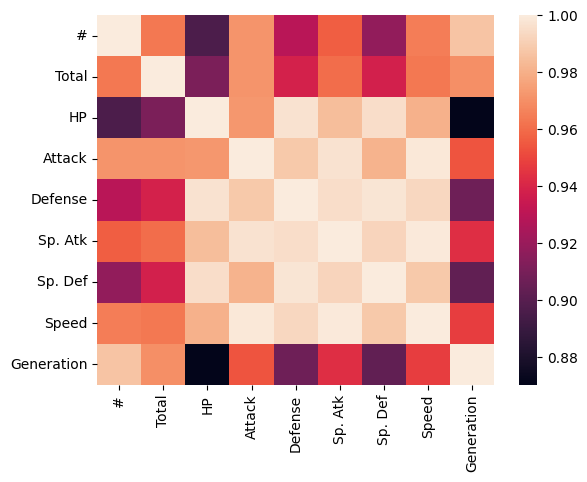

In [12]:
sns.heatmap(num_col_info_df.corr())

# C. Đặt câu hỏi có ý nghĩa cần trả lời

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Câu hỏi 1:

### 1.1 Nội dung câu hỏi
- Làm thế nào sự tương quan giữa các thuộc tính "Attack" và "Defense" của các Pokemon tỉ lệ với thế hệ (Generation) mà chúng thuộc về?

### 1.2 Lợi ích khi trả lời câu hỏi
- Hiểu rõ tương quan giữa Attack và Defense: Câu hỏi này giúp hiểu rõ mối quan hệ giữa khả năng tấn công (Attack) và khả năng phòng thủ (Defense) của Pokemon. Có thể xác định xem có mối liên quan nào giữa hai thuộc tính này hay không.

- Phân tích theo thế hệ (Generation): Phân tích sự biến đổi của tương quan theo thế hệ giúp nhận biết xu hướng hoặc thay đổi trong các thế hệ khác nhau của Pokemon. Điều này có thể cung cấp thông tin về sự phát triển của các loại Pokemon qua thời gian.

- Trực quan hóa với biểu đồ scatter: Sử dụng biểu đồ scatter cho phép trực quan hóa dữ liệu và nhận ra các xu hướng hoặc mẫu tương quan giữa Attack và Defense. Biểu đồ còn giúp thấy rõ sự phân bố của các điểm dữ liệu trong mỗi thế hệ.

- Thông tin hữu ích cho người chơi và nhà phân tích: Đối với người chơi Pokemon hoặc những người quan tâm đến các yếu tố chiến thuật, thông tin này có thể cung cấp những gợi ý về cách lựa chọn Pokemon dựa trên tương quan giữa khả năng tấn công và phòng thủ.

- Mở rộng kiến thức về dữ liệu Pokemon: Cung cấp cái nhìn tổng quan về tương quan giữa các thuộc tính quan trọng của Pokemon trong bối cảnh thế hệ.

### 1.3 Bước tiền xử lý:
- Kiểm tra giá trị trống trong các cột "Attack", "Defense", và "Generation".
- Đảm bảo kiểu dữ liệu phù hợp cho phân tích.

### 1.4 Bước phân tích:
- Tạo các nhóm dữ liệu dựa trên thế hệ (Generation).
- Tính toán độ tương quan giữa "Attack" và "Defense" trong từng nhóm.
- Biểu diễn tương quan bằng biểu đồ scatter hoặc biểu đồ tương quan.

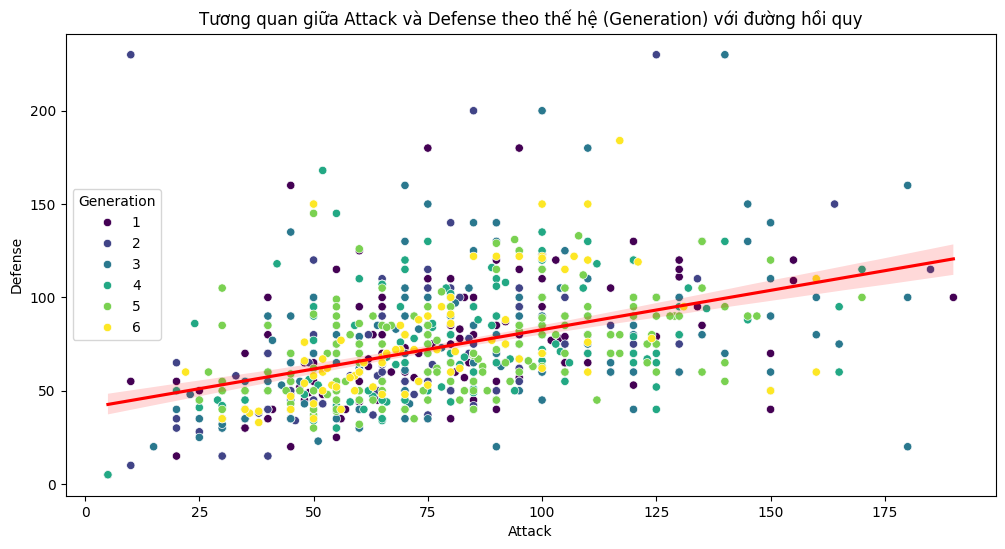

In [15]:
# Đọc dữ liệu từ file CSV
pokemon_data = pd.read_csv("Pokemon.csv")

# Loại bỏ dữ liệu thiếu
pokemon_data.dropna(subset=['Attack', 'Defense', 'Generation'], inplace=True)

# Nhóm dữ liệu theo thế hệ (Generation)
generation_groups = pokemon_data.groupby('Generation')

# Tính toán độ tương quan giữa "Attack" và "Defense"
correlation_data = generation_groups[['Attack', 'Defense']].corr().iloc[0::2, -1].reset_index()

# Biểu diễn tương quan bằng biểu đồ scatter với đường hồi quy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Generation', data=pokemon_data, palette='viridis')

# Thêm đường hồi quy
sns.regplot(x='Attack', y='Defense', data=pokemon_data, scatter=False, color='red')

plt.title('Tương quan giữa Attack và Defense theo thế hệ (Generation) với đường hồi quy')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

### 1.5 Nhận xét
- Phân Bố Điểm:
Biểu đồ scatter cho thấy sự phân bố của các Pokémon trên mặt phẳng Attack và Defense. Mỗi điểm biểu diễn một Pokémon và màu sắc của điểm biểu diễn thế hệ (Generation) của Pokémon đó.
- Tương Quan Chung:
Có thể quan sát một mối liên quan chung giữa khả năng tấn công (Attack) và khả năng phòng thủ (Defense) của Pokémon. Nếu có xu hướng chung đi lên từ góc trái dưới đến góc phải trên, có thể ngụ ý rằng các Pokémon có Attack cao thường có Defense cao và ngược lại.
- Phân Biệt Thế Hệ:
Việc sử dụng màu sắc để phân biệt các thế hệ giúp nhìn ra sự thay đổi trong tương quan giữa Attack và Defense theo thời gian. Nếu có sự biến đổi màu sắc giữa các điểm, đó có thể là dấu hiệu của sự thay đổi trong mối quan hệ này qua các thế hệ khác nhau.
- Điểm Nổi Bật và Ngoại Lệ:
Có thể xác định các điểm nổi bật trên biểu đồ, đặc biệt là các điểm ở phía trên cùng bên phải hoặc phía dưới cùng bên trái. Những điểm này có thể là Pokémon có Attack và Defense đặc biệt cao hoặc thấp, và chúng có thể là những Pokémon nổi bật trong thế hệ của mình.
- Cải Thiện:
Để biểu đồ trở nên thêm rõ ràng, có thể thêm nhãn văn bản cho mỗi điểm, hiển thị tên hoặc ID của Pokémon. Điều này sẽ giúp xác định các Pokémon cụ thể trên biểu đồ một cách dễ dàng hơn.

## Câu hỏi 2:

### 2.1 Nội dung câu hỏi
Trong số các Pokemon thuộc thế hệ thứ mấy (Generation), nhóm Type 2 (Pokemon có 2 hệ) nào có tổng cộng điểm Total trung bình cao nhất?

### 2.2 Lợi ích khi trả lời câu hỏi
- Hiểu rõ hơn về mối quan hệ giữa Thế hệ và các nhóm Type 2 của Pokemon:
Kết quả từ câu hỏi này có thể cung cấp thông tin về sự phát triển của các loại Pokemon qua từng thế hệ và giúp người chơi hiểu rõ hơn về cách các nhóm Type 2 có thể thay đổi theo thời gian.
- Định hình chiến thuật trong trò chơi:
Nhóm Type 2 nào có điểm Total trung bình cao nhất trong mỗi thế hệ có thể là một chỉ số hữu ích cho người chơi xây dựng đội hình Pokemon mạnh mẽ. Thông tin này có thể hỗ trợ quyết định về chiến thuật và lựa chọn Pokemon trong quá trình chơi.
- Phân tích sự biến đổi qua thời gian:
Biểu đồ thể hiện sự thay đổi của điểm Total trung bình cho từng nhóm Type 2 qua các thế hệ có thể giúp phân tích xu hướng và dự đoán phát triển tương lai của các loại Pokemon.
- Thông tin hữu ích cho cộng đồng Pokemon:
Kết quả có thể được chia sẻ trong cộng đồng Pokemon để tạo ra thảo luận và chia sẻ kiến thức giữa các người chơi Pokemon. Điều này có thể giúp cộng đồng hiểu rõ hơn về động lực và tính cách của các nhóm Type 2.
- Tích hợp với trải nghiệm người chơi:
Thông tin này có thể được tích hợp vào trải nghiệm người chơi thông qua các cập nhật hoặc phiên bản mới của trò chơi Pokemon, tăng cường sự liên kết giữa cộng đồng và trò chơi.

### 2.3 Bước tiền xử lý:
- Kiểm tra giá trị trống trong cột "Generation" và "Type 2".
- Đảm bảo kiểu dữ liệu phù hợp cho việc phân tích.

### 2.4 Bước phân tích:
- Tính tổng cộng điểm Total trung bình cho từng nhóm Type 2 trong mỗi thế hệ.
- Xác định nhóm Type 1 có điểm Total trung bình cao nhất trong mỗi thế hệ.

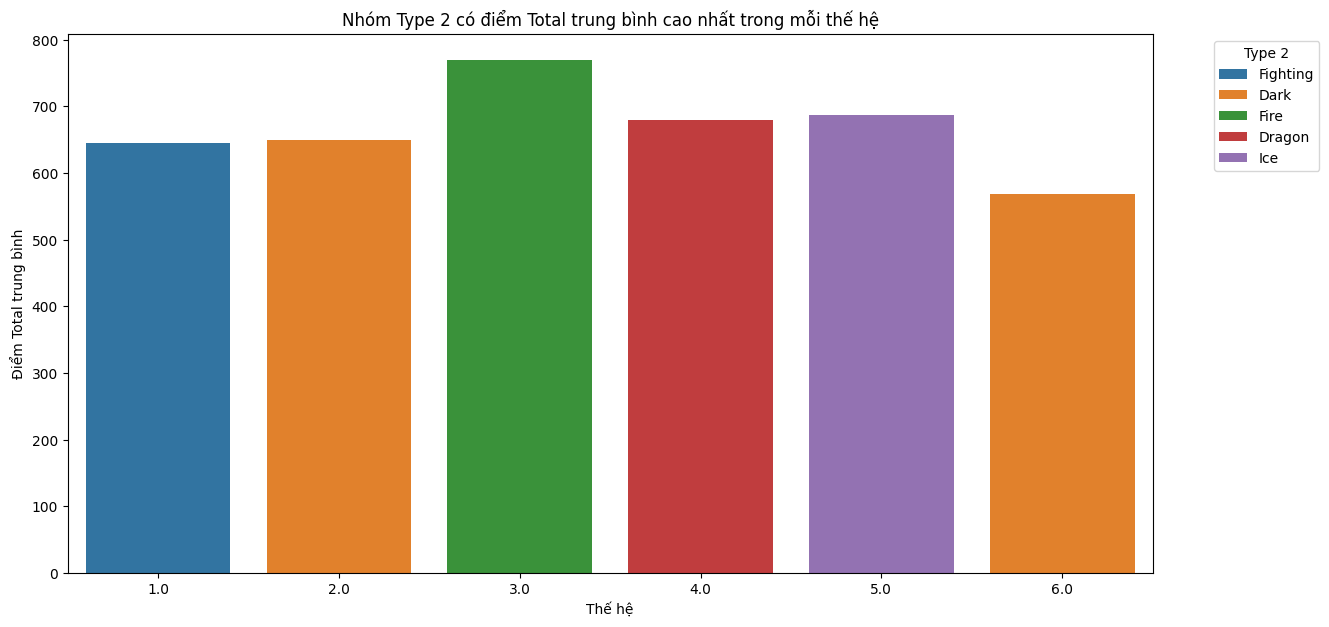

In [16]:
# Load dataset
pokemon_data = pd.read_csv("Pokemon.csv")

# Tạo một bản sao của DataFrame để tránh cảnh báo SettingWithCopyWarning
pokemon_data_copy = pokemon_data.copy()

# Kiểm tra giá trị trống trong cột "Generation" và "Type 2"
pokemon_data_copy[['Generation', 'Type 2']] = pokemon_data_copy[['Generation', 'Type 2']].dropna()

# Gán kết quả trở lại DataFrame gốc
pokemon_data[['Generation', 'Type 2']] = pokemon_data_copy[['Generation', 'Type 2']]

# Tính tổng cộng điểm Total trung bình cho từng nhóm Type 2 trong mỗi thế hệ
average_total_by_type_and_gen = pokemon_data.groupby(['Generation', 'Type 2'])['Total'].mean().reset_index()

# Xác định nhóm Type 2 có điểm Total trung bình cao nhất trong mỗi thế hệ
max_avg_total_by_gen = average_total_by_type_and_gen.loc[average_total_by_type_and_gen.groupby('Generation')['Total'].idxmax()]

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 7))
sns.barplot(x='Generation', y='Total', hue='Type 2', data=max_avg_total_by_gen)
plt.title('Nhóm Type 2 có điểm Total trung bình cao nhất trong mỗi thế hệ')
plt.xlabel('Thế hệ')
plt.ylabel('Điểm Total trung bình')
plt.legend(title='Type 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 2.5 Nhận xét
- Sự Biến Động Của Nhóm Type 2:
Biểu đồ cho thấy sự biến động đáng kể về điểm Total trung bình của các nhóm Type 2 qua các thế hệ. Điều này có thể phản ánh sự thay đổi trong sức mạnh hoặc phổ biến của từng nhóm Type 2 theo thời gian.
- Thay Đổi Động Lực Trong Game:
Các thế hệ khác nhau có thể mang lại sự thay đổi động lực trong trò chơi Pokemon. Việc nhóm Type 2 nào có điểm Total cao nhất thay đổi có thể ảnh hưởng đến cách người chơi xây dựng đội hình và chiến thuật.
- Sự Đa Dạng Của Các Thế Hệ:
Có thể nhận thấy rằng trong mỗi thế hệ, có sự đa dạng về nhóm Type 2 có điểm Total cao nhất. Điều này có thể tạo ra trải nghiệm chơi game đa dạng và thú vị qua các thế hệ khác nhau.
- Các Nhóm Type 2 Thịnh Hành:
Nhóm Type 2 nào có điểm Total cao nhất có thể là điểm nhấn trong cộng đồng người chơi và có thể tạo ra sự thịnh hành cho các loại Pokemon đó trong thời kỳ đó.
- Khả năng Dự Đoán Tương Lai:
Biểu đồ có thể cung cấp cái nhìn về xu hướng tương lai. Nếu có một nhóm Type 2 đang tăng động mạnh qua các thế hệ, điều này có thể là dấu hiệu về sự thịnh hành trong tương lai.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [18]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Câu hỏi 3:

### 3.1 Nội dung câu hỏi:
- Tương quan sức mạnh (Tổng chỉ số) của các Pokemon qua từng thế hệ và đối với từng type (Chỉ tính main type là `Type 1`) khác nhau như thế nào?

### 3.2 Lợi ích khi trả lời câu hỏi:
- Thấy được tương quan sức mạnh của pokemon qua các thế hệ.
- Có thể thấy được những hệ pokemon mạnh nhất của từng thế hệ.
- Giúp cho người chơi có thêm thông tin để lựa chọn pokemon khi chơi các tựa game có chứa nhiều thế hệ pokemon.
- Những người chơi cạnh tranh ở các giải đấu có thể dùng thông tin này để đưa ra các đội hình hợp lý, min max chỉ số, có chiến thuật tối ưu hơn.

### 3.3 Bước tiền xử lý:
- Kiểm tra các giá trị trống trong cột `Type 1`, `Total` và `Generation`.
- Đảm bảo kiểu dữ liệu phù hợp để kiểm tra.

### 3.4 Bước phân tích:
- Chia ra các bộ dữ liệu riêng cho từng thế hệ và type (`Total` và `Type 1`) dựa trên `pokemon_data`.
- Tính trung bình cho cột `Total` của bộ dữ liệu.
- Biểu diễn tương quan bằng biểu đồ scatter.

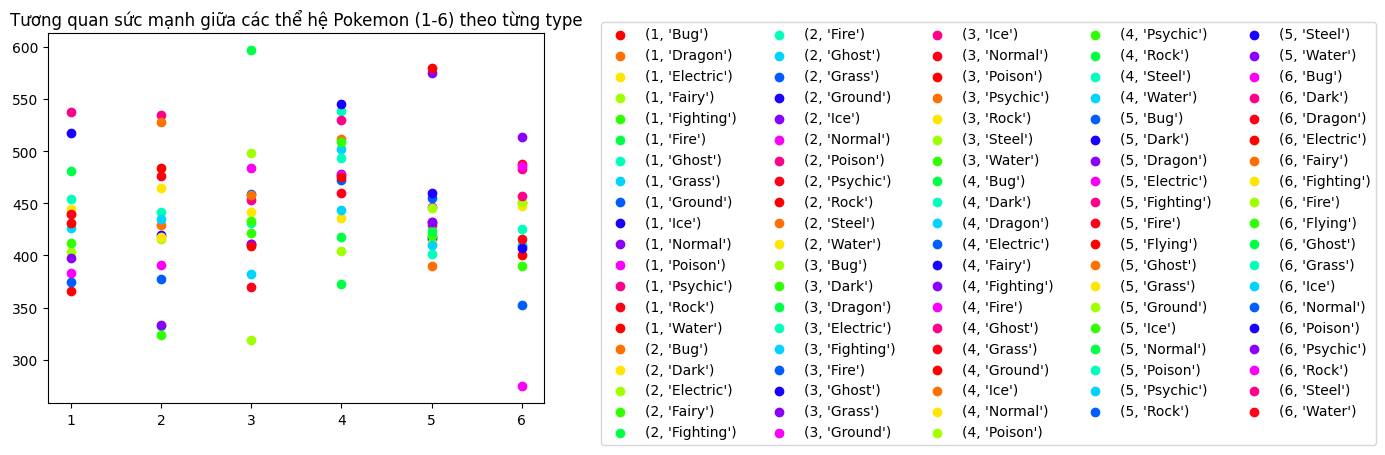

<Figure size 1200x600 with 0 Axes>

In [19]:
pokemon_data = pd.read_csv('Pokemon.csv')

# Kiểm tra giá trị trống
pokemon_data.dropna(subset=['Total', 'Generation', 'Type 1'], inplace=True)
n_pokemon_data = pokemon_data[['Type 1', 'Total', 'Generation']]
# Tạo nhóm dữ liệu dựa trên thế hệ (Generation)
generation_groups = n_pokemon_data.groupby(['Generation', 'Type 1'])

# Tính trung bình cột Total
corr_data = generation_groups['Total'].mean()

# Trực quan hóa dữ liệu
discr = np.linspace(0, 1, 14)
colors = cm.hsv(discr)
ax = plt.subplot(111)
plt.figure(figsize=(12, 6))
i = 0
for index, value in corr_data.items():
    if i > 13: i = 0
    ax.scatter(x = index[0], y = value, color = colors[i])
    i += 1
ax.legend(corr_data.index, bbox_to_anchor = (1.1, 1.05), ncol = 5)
ax.set_title('Tương quan sức mạnh giữa các thể hệ Pokemon (1-6) theo từng type')
plt.show()


### 3.5 Nhận xét:
- Phân bố:
Biểu đồ gồm 6 giá trị x tương ứng với 6 thế hệ, y là độ lớn tổng chỉ số, các chấm trên vị trí x,y tương ứng với type Pokemon thuộc thế hệ x có tổng chỉ số trung bình là y.
- Hệ Psychic thế hệ 1 có chỉ số cao nhất.
- Hệ Poison thế hệ 2 có chỉ số cao nhất.
- Hệ Dragon thế hệ 3 có chỉ số cao nhất.
- Hệ Dragon thế hệ 4 có chỉ số cao nhất.
- Hệ Fire thế hệ 5 có chỉ số cao nhất.
- Hệ Psychic thế hệ 6 có chỉ số cao nhất. 

## Câu hỏi 4:

### 4.1 Nội dung câu hỏi:
- Trong tất cả các Pokemon huyền thoại (Legendary), Pokemon nào mang chỉ số cao nhất đối với từng chỉ số riêng biệt. (VD: Blissey có chỉ số HP cao nhất trong tất cả Pokemon, Shuckle có chỉ số Sp. Def cao nhất trong tất cả Pokemon)

### 4.2 Lợi ích khi trả lời câu hỏi:
- Đây là thông tin hữu ích dành cho người chơi thích hoặc vì chiến thuật cần tập trung vào một chỉ số riêng biệt, có thể áp dụng trong trò chơi thông thường cũng như trong các giải đấu.
- Cung cấp thêm thông tin về các Pokemon mà người chơi có thể chưa biết tới, chưa tiếp cận được, vì Pokemon huyền thoại rất hiếm.
- Có thể lấy những Pokemon này làm cột mốc để đánh giá, phân tích chỉ số của những pokemon khác.

### 4.3 Bước tiền xử lý:
- Kiểm tra giá trị trống trong các cột `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, `Legendary`.
- Đảm bảo kiểu dữ liệu phù hợp cho việc kiểm tra.

### 4.4 Bước phân tích:
- Tạo ra bộ dữ liệu chỉ chứa các Pokemon có `Legendary` là True.
- Xóa các cột không liên quan đến câu hỏi.
- Tìm ra các giá trị cao nhất cho mỗi cột chỉ số.
- Vẽ biểu đồ barplot cho dữ liệu đã lọc ra.

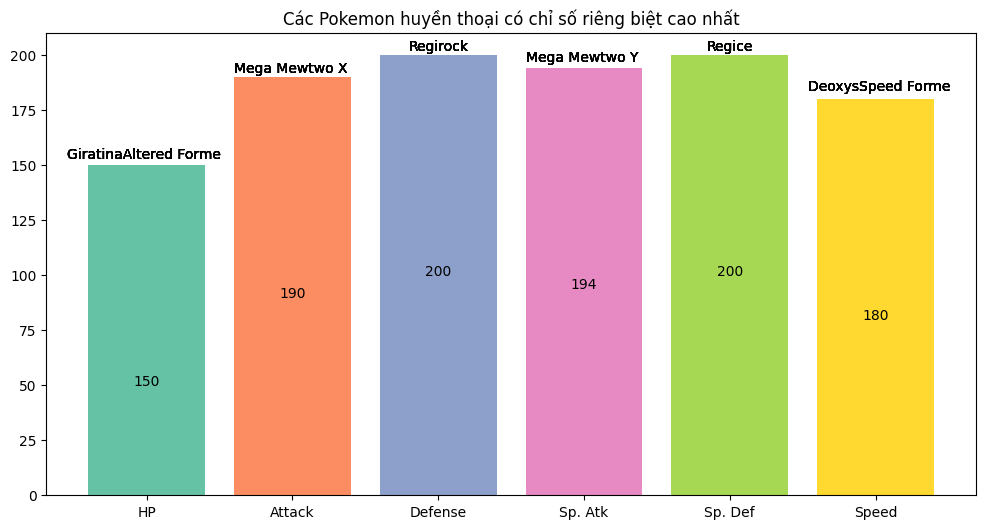

In [20]:
pokemon_data = pd.read_csv('Pokemon.csv')
# Kiểm tra giá trị trống
pokemon_data.dropna(subset=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'], inplace=True)
# Lọc ra các Pokemon huyền thoại và chỉ giữ lại các cột cần thiết
legendary_pokemon = pokemon_data.loc[pokemon_data['Legendary'] == True].reset_index()
legendary_pokemon = legendary_pokemon.drop(columns=['index', '#', 'Type 1', 'Type 2', 'Total', 'Generation', 'Legendary'])
# Tìm ra các Pokemon sở hữu chỉ số riêng biệt cao nhất
max_each_stat = legendary_pokemon.set_index('Name').max().to_frame().T
# Lấy tên Pokemon có chỉ số riêng biệt cao nhất trong mỗi cột
max_name = legendary_pokemon.set_index('Name').idxmax()
# Trực quan hóa dữ liệu
colors = sns.color_palette("Set2", n_colors=len(legendary_pokemon.columns))

plt.figure(figsize=(12, 6))
# Extracting column names and values
columns = max_each_stat.columns
values = max_each_stat.values[0]
# Creating a bar plot using plt.bar
bpl = plt.bar(columns, values,color=colors)
# Adding labels to the bars
for bar, label,color in zip(bpl, values,colors):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() -100 , label, ha='center', color='black')
# Adding annotations without arrows
for col, name in zip(columns, max_name):
    index = columns.get_loc(col)
    plt.annotate('GiratinaAltered Forme', xy = ('HP', 200), xytext = (-0.55,153))
    plt.annotate('Mega Mewtwo X', xy = ('Attack', 200), xytext = (0.6,192))
    plt.annotate('Regirock', xy = ('Defense', 200), xytext = (1.8,202))
    plt.annotate('Mega Mewtwo Y', xy = ('Sp. Atk', 200), xytext = (2.6,197))
    plt.annotate('Regice', xy = ('Sp. Def', 200), xytext = (3.84,202))
    plt.annotate('DeoxysSpeed Forme', xy = ('Speed', 200), xytext = (4.54,184))
plt.title('Các Pokemon huyền thoại có chỉ số riêng biệt cao nhất')
plt.show()



### 4.5 Nhận xét:
- Phân bố:
Mỗi cột ứng với 1 loại chỉ số, chiều cao mỗi cột là giá trị của chỉ số, tên của mỗi cột ứng với Pokemon mang chỉ số đó.
- Đánh giá chỉ số:
Có thể thấy Pokemon huyền thoại có trần chỉ số rất cao, giúp người chơi có thể chọn ra những Pokemon dùng cho chiến thuật vai trò khắc chế (VD: có thể dùng Regice có Sp. Def 200 để khắc chế Mega Mewtwo Y có Sp. Atk 194)
- Cải thiện:
Có thể tạo thêm 1 biểu đồ về các Pokemon không phải huyền thoại có chỉ số riêng biệt cao nhất để so sánh được sự khác biệt giữa Pokemon bình thường và Pokemon huyền thoại.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Câu hỏi 5:

### 5.1 Nội dung câu hỏi:
- Xu hướng thay đổi của các chỉ số qua các thế hệ như thế nào?


### 5.2 Lợi ích khi trả lời câu hỏi:
- Hiểu rõ sự phát triển của Pokemon qua thời gian.
- Phát hiện ra tính cách đặc trưng của mỗi thế hệ.
- Hiểu rõ về sự thay đổi của mỗi chủng loài.
- Đưa ra thông tin hữu ích cho cộng đồng Pokemon.
- Tạo ra nội dung hấp dẫn cho người chơi.
- Nếu bạn đang phát triển hoặc quản lý trò chơi Pokémon, việc biết rõ về xu hướng có thể giúp bạn lập kế hoạch cho sự xuất hiện của các Pokémon và điều chỉnh độ khó của trò chơi theo thời gian.
- Nếu bạn có dữ liệu từ các thế hệ Pokémon hiện tại, bạn có thể sử dụng xu hướng để dự đoán sự phát triển tương lai. Điều này có thể hữu ích trong việc định hình chiến lược cho các phiên bản Pokémon sắp tới.



### 5.3 Bước tiền xử lý:
- Kiểm tra dữ liệu thô
- Xử lí giá trị trống
- Kiểm tra dữ liệu trùng lặp
- Kiểm tra các định dạng dữ liệu 
- Kiểm tra sự liên kết giữa các thuộc tính

### 5.4 Bước phân tích:
- Tạo một Dataframe để chưa các thuộc tính cần xét xu hướng.
- Tính trung bình các thuộc tính đấy trong mỗi thế hệ. 
- vẽ biểu đồ xu hướng để thấy rõ.

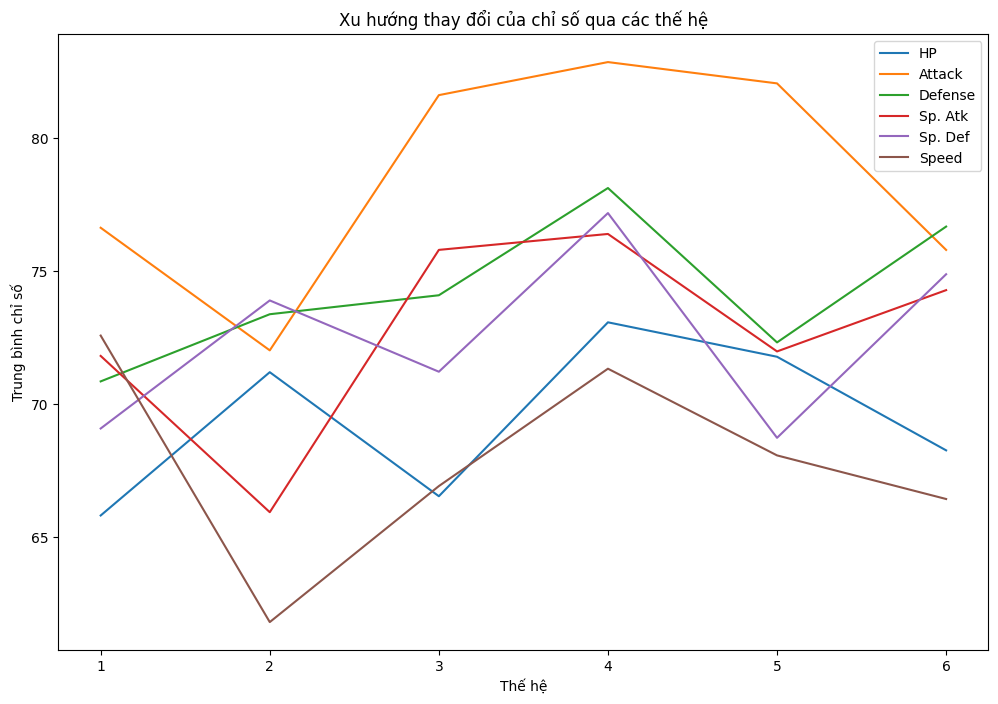

In [23]:
pokemon_data = df
columns_of_interest = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

selected_columns_df = pokemon_data[columns_of_interest]

average_stats_by_generation = selected_columns_df.groupby('Generation').mean()

plt.figure(figsize=(12, 8))
for stat in columns_of_interest[:-1]:  # Loại bỏ cột 'Generation' khỏi danh sách vì chúng ta sẽ vẽ theo thế hệ
    plt.plot(average_stats_by_generation.index, average_stats_by_generation[stat], label=stat)

plt.xlabel('Thế hệ')
plt.ylabel('Trung bình chỉ số')
plt.title('Xu hướng thay đổi của chỉ số qua các thế hệ')
plt.legend()
plt.show()

### 5.5 Nhận xét
- Ở gen 4 có xu hướng tăng tất cả các chỉ số.
- Và sau đó có xu hướng giảm ở gen 5.
- Nhìn chung thì Pokemon có trung bình chỉ số cao nhất ở gen 4 và thấp nhất ở gen 2.

# Câu hỏi 6:

### 6.1 Nội dung câu hỏi:
- Với mỗi loại Pokemon thì phân phối chỉ số như thế nào? Từ đó chỉ ra chỉ số nào là đặc trưng.

### 6.2 Lợi ích khi trả lời câu hỏi:
- Phân biệt được sức mạnh riêng của mỗi hệ, từ đó cung cấp thông tin về dặc tính và khả năng chiến đấu của từng loại.
- Xây dựng chiến lược huấn luyện hiệu quả, chẳng hạn như chọn lựa Pokemon có chỉ số mạnh mẽ để tham gia các trận đấu.
- Các thông tin về chỉ số cao nhất có thể được sử dụng để hỗ trợ quyết định trong việc chọn lựa Pokémon trong trò chơi hoặc các sự kiện thi đấu Pokémon.
- Câu hỏi này có thể là bước khởi đầu cho nhiều nghiên cứu và phân tích chi tiết hơn về mối quan hệ giữa loại Pokémon và chỉ số của chúng

### 6.3 Bước tiền xử lý:
- Kiểm tra dữ liệu thô
- Xử lí giá trị trống
- Kiểm tra dữ liệu trùng lặp
- Kiểm tra các định dạng dữ liệu 
- Kiểm tra sự liên kết giữa các thuộc tính

### 6.4 Bước phân tích:
- Melt DataFrame để tạo dữ liệu dạng "long" cho boxplot.
- Tạo boxplot.
- Nhìn theo plot để chỉ ra chỉ số đặc trưng cho mỗi hệ.

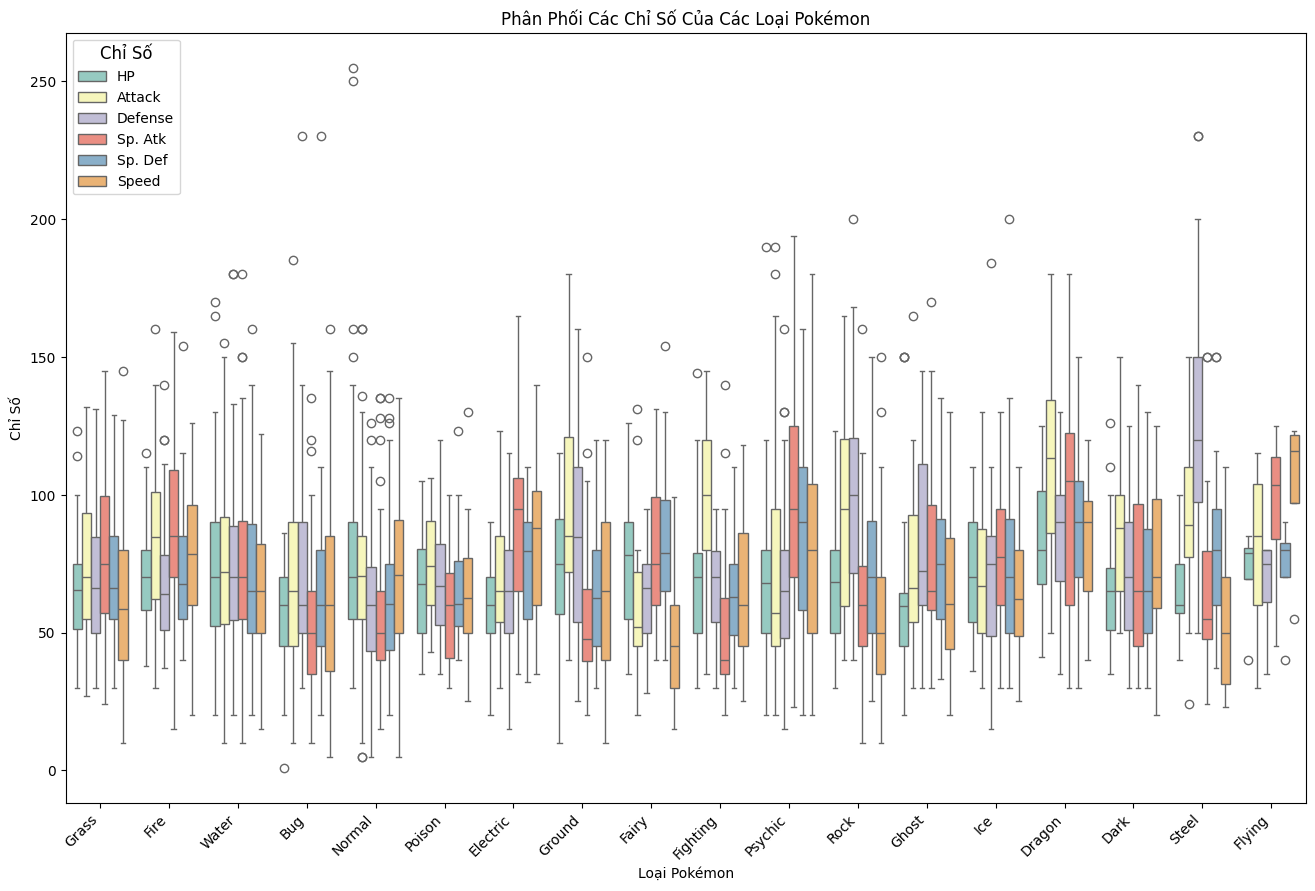

In [24]:
selected_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

df_melted = pd.melt(pokemon_data, id_vars=['Type 1'], value_vars=selected_columns, var_name='Stat', value_name='Value')

plt.figure(figsize=(16, 10))
sns.boxplot(x='Type 1', y='Value', hue='Stat', data=df_melted, palette='Set3')
plt.title('Phân Phối Các Chỉ Số Của Các Loại Pokémon')
plt.xlabel('Loại Pokémon')
plt.ylabel('Chỉ Số')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Chỉ Số', title_fontsize='12')
plt.show()

### 6.5 Nhận xét
- Với hệ Grass, Fire thì thiên về Tấn công và Tấn công đặc biệt.
- Với hệ Water, Ice thì chỉ số khá đồng đều, không cao cũng không thấp.
- Với hệ Bug thì chỉ số thấp ở Máu và Tấn công đặc biệt.
- Với hệ Normal thì chỉ số cao ở Máu và Tốc độ.
- Với hệ Poison thì chỉ số cao ở Tấn công và thấp ở Tấn công đặc biệt.
- Với hệ Electric thì chỉ số cao ở Tấn công đặc biệt và Tốc độ.
- Với hệ Ground thì chỉ số cao ở Tấn công và Phòng thủ, thay vào đó thì Tấn công đặc biệt và Phòng thủ đặc biệt thấp.
- Với hệ Fairy thì chỉ số cao ở Tấn công đặc biệt và Phòng thủ đặc biệt, thấp ở Tấn công và rất thấp ở Tốc độ.
- Với hệ Fighting thì cao ở Tấn công.
- Với hệ Psychic thì cao ở Tấn công đặc biệt và phòng ngự đặc biệt.
- Với hệ Rock thi cao ở Tấn công và Phòng thủ, Thấp ở Máu, Tấn công đặc biệt và Tốc độ.
- Với hệ Ghost thì thấp ở chỉ số Máu nhưng chỉ số Phòng ngự cao.
- Với hệ Dragon thì chỉ số cao ở Tấn công và Tấn công đặc biệt.
- Với hệ Dark thì chỉ số khá đồng đều nhưng thấp ở Máu.
- Với hệ Steel thì chỉ số Phòng ngự rất cao dù Máu thấp.
- Với hệ Flying thì chỉ số Tấn công, Tấn công đặc biệt và Tốc độ cao. 